In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
#plotting
import matplotlib.pyplot as plt

import mplhep as hep
import numpy as np
plt.style.use(hep.style.CMS)  # or ATLAS/LHCb2

# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from analysis.tools import ffschema, sidm_processor
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)

<module 'analysis.tools.sidm_processor' from '/home/cms-jovyan/logs/SIDM/analysis/studies/../../analysis/tools/sidm_processor.py'>

In [2]:
'''
Sample names:
sample_name1 = "SIDM_XXTo2ATo2Mu2E_mXX-100_mA-5_ctau-4"
sample_name2 = "SIDM_XXTo2ATo2Mu2E_mXX-150_mA-5_ctau-2p7"
sample_name3 = "SIDM_XXTo2ATo2Mu2E_mXX-200_mA-5_ctau-2"
sample_name4 = "SIDM_XXTo2ATo2Mu2E_mXX-500_mA-5_ctau-0p8"
sample_name5 = "SIDM_XXTo2ATo2Mu2E_mXX-800_mA-5_ctau-0p5"
sample_name6 = "SIDM_XXTo2ATo2Mu2E_mXX-1000_mA-5_ctau-0p4"
'''

'\nSample names:\nsample_name1 = "SIDM_XXTo2ATo2Mu2E_mXX-100_mA-5_ctau-4"\nsample_name2 = "SIDM_XXTo2ATo2Mu2E_mXX-150_mA-5_ctau-2p7"\nsample_name3 = "SIDM_XXTo2ATo2Mu2E_mXX-200_mA-5_ctau-2"\nsample_name4 = "SIDM_XXTo2ATo2Mu2E_mXX-500_mA-5_ctau-0p8"\nsample_name5 = "SIDM_XXTo2ATo2Mu2E_mXX-800_mA-5_ctau-0p5"\nsample_name6 = "SIDM_XXTo2ATo2Mu2E_mXX-1000_mA-5_ctau-0p4"\n'

In [3]:
sample_dir = "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018/"
fileset = {
    "2Mu2E_100GeV_1p2GeV_9p6mm": [
        "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018/SIDM_XXTo2ATo2Mu2E_mXX-100_mA-1p2_ctau-9p6_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_161703/0000/ffNtuple_1.root",
    ],
    "2Mu2E_100GeV_1p2GeV_0p096mm": [
        "root://xcache//store/group/lpcmetx/SIDM/ffNtupleV4/2018/SIDM_XXTo2ATo2Mu2E_mXX-100_mA-1p2_ctau-0p096_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155855/0000/ffNtuple_1.root",
    ],
    
    "SIDM_XXTo2ATo2Mu2E_mXX-100_mA-5_ctau-4": [ #sample_name1
        f"{sample_dir}/SIDM_XXTo2ATo2Mu2E_mXX-100_mA-5_ctau-4_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155809/0000/ffNtuple_1.root"
    ],
    "SIDM_XXTo2ATo2Mu2E_mXX-150_mA-5_ctau-2p7": [  #sample_name2
        f"{sample_dir}/SIDM_XXTo2ATo2Mu2E_mXX-150_mA-5_ctau-2p7_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155637/0000/ffNtuple_1.root"
    ],
    "SIDM_XXTo2ATo2Mu2E_mXX-200_mA-5_ctau-2": [  #sample_name3
        f"{sample_dir}/SIDM_XXTo2ATo2Mu2E_mXX-200_mA-5_ctau-2_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_155722/0000/ffNtuple_1.root"
    ],
    "SIDM_XXTo2ATo2Mu2E_mXX-500_mA-5_ctau-0p8": [  #sample_name4
        f"{sample_dir}/SIDM_XXTo2ATo2Mu2E_mXX-500_mA-5_ctau-0p8_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_160450/0000/ffNtuple_1.root"
    ],
    "SIDM_XXTo2ATo2Mu2E_mXX-800_mA-5_ctau-0p5": [  #sample_name5
        f"{sample_dir}/SIDM_XXTo2ATo2Mu2E_mXX-800_mA-5_ctau-0p5_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_153128/0000/ffNtuple_1.root"
    ],
    "SIDM_XXTo2ATo2Mu2E_mXX-1000_mA-5_ctau-0p4": [  #sample_name6
        f"{sample_dir}/SIDM_XXTo2ATo2Mu2E_mXX-1000_mA-5_ctau-0p4_TuneCP5_13TeV-madgraph-pythia8/RunIIAutumn18DRPremix-102X_upgrade2018_realistic_v15-v1/210326_154240/0000/ffNtuple_1.root"
    ]
}

runner = processor.Runner(
    executor=processor.IterativeExecutor(),
    schema=ffschema.FFSchema,
)

p = sidm_processor.SidmProcessor(
    [
        "2mu2e", "4mu"
    ],
    ["base_plus_gen"]
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)

Output()

Output()

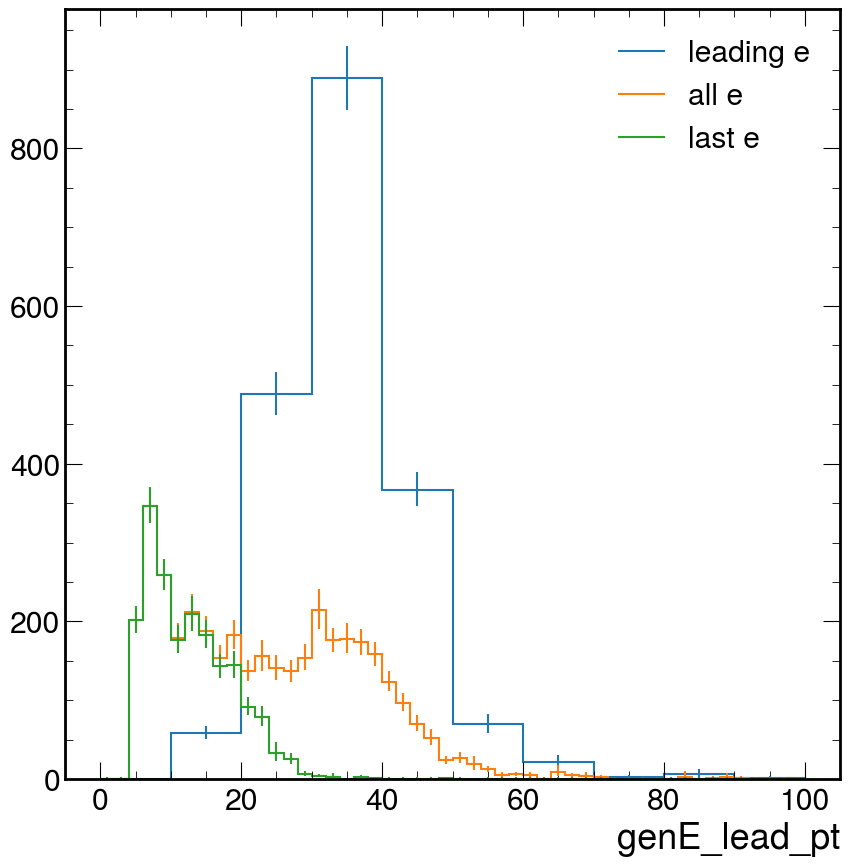

In [4]:
hep.histplot(output['out']["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]["genE_lead_pt"]["2mu2e", :100j], label="genE_lead_pt")
hep.histplot(output['out']["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]["genE_pt"]["2mu2e", :100j], label="genE_pt")
hep.histplot(output['out']["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]["genE_last_pt"]["2mu2e", :100j], label="genE_last_pt")
#genE_last was made to show that it and the leading electron line up to trace the start and end of the larger genE histogram.
#This was mostly for testing to show that the leading plot looked right
#It doesn't work anymore, since the genE_lead_pt histogram has larger bin sizes than the others
plt.legend(["leading e", "all e", "last e"])
plt.show()

This is a test of the mplhep package's density parameter which automatically normalizes a histogram.

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f709eb855b0>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

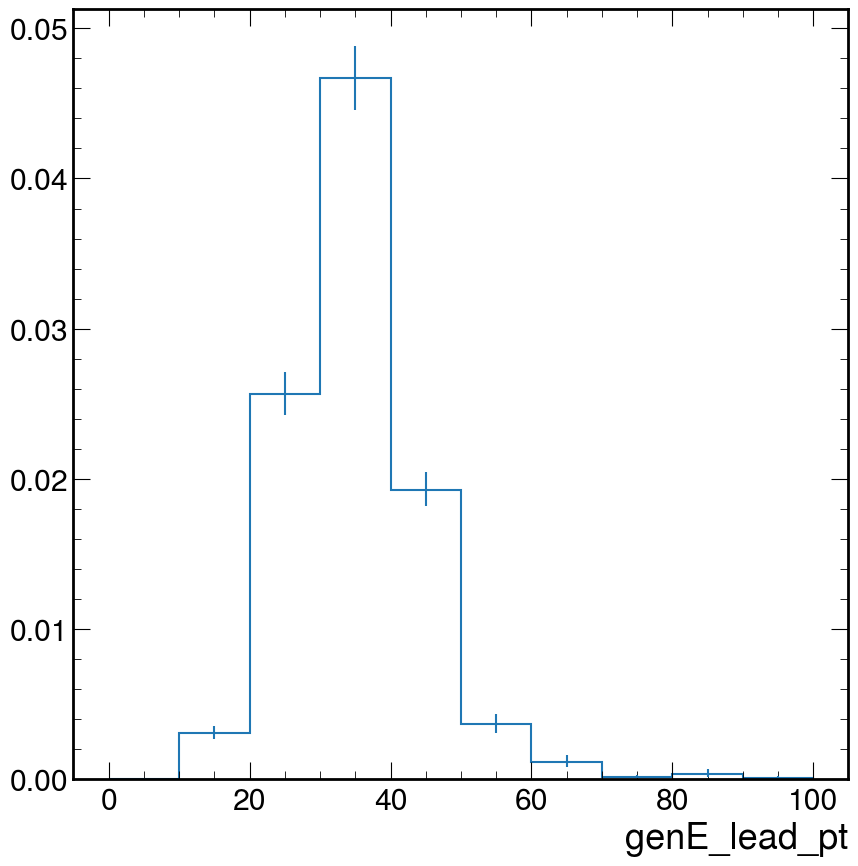

In [5]:
hep.histplot(output['out']["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]["genE_lead_pt"]["2mu2e", :100j], density=True)

This code combines the density parameter with the use of subplots to place two histograms side by side. This uses two seperate samples from the runner process above. (It is also skewed because of the changes to genE_lead_pt binning)

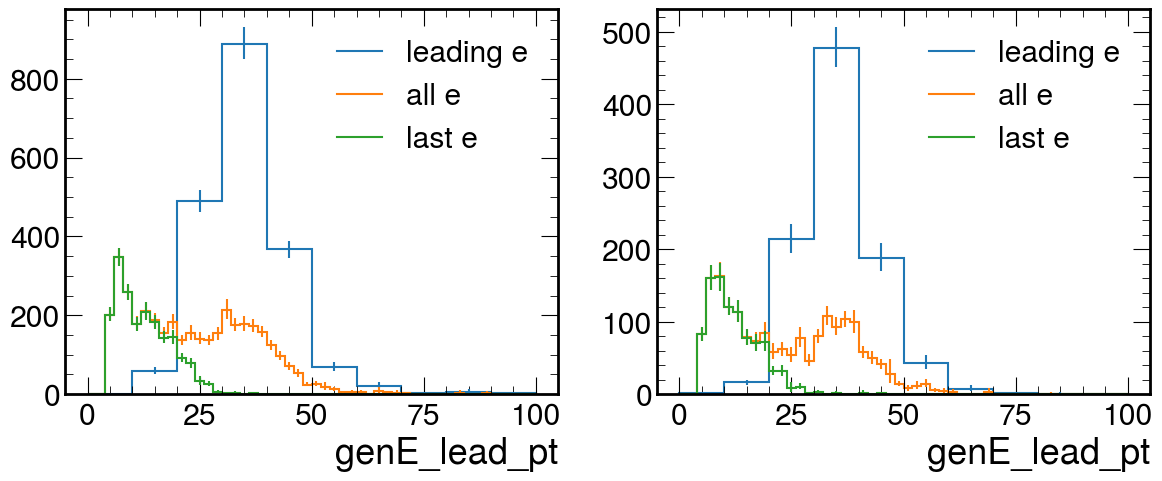

In [6]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,5))
hep.histplot(output['out']["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]["genE_lead_pt"]["2mu2e", :100j], ax=ax1)
hep.histplot(output['out']["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]["genE_pt"]["2mu2e", :100j], ax=ax1)
hep.histplot(output['out']["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]["genE_last_pt"]["2mu2e", :100j], ax=ax1)
#genE_last was made to show that it and the leading electron line up to trace the start and end of the larger genE histogram.
#This was mostly for testing to show that the leading plot looked right
ax1.legend(["leading e", "all e", "last e"])

hep.histplot(output['out']["2Mu2E_100GeV_1p2GeV_0p096mm"]["hists"]["genE_lead_pt"]["2mu2e", :100j], ax=ax2)
hep.histplot(output['out']["2Mu2E_100GeV_1p2GeV_0p096mm"]["hists"]["genE_pt"]["2mu2e", :100j], ax=ax2)
hep.histplot(output['out']["2Mu2E_100GeV_1p2GeV_0p096mm"]["hists"]["genE_last_pt"]["2mu2e", :100j], ax=ax2)
ax2.legend(["leading e", "all e", "last e"])

plt.show()

These next few plots are variations of what was done above, but using muons found in the 2mu2e channel.

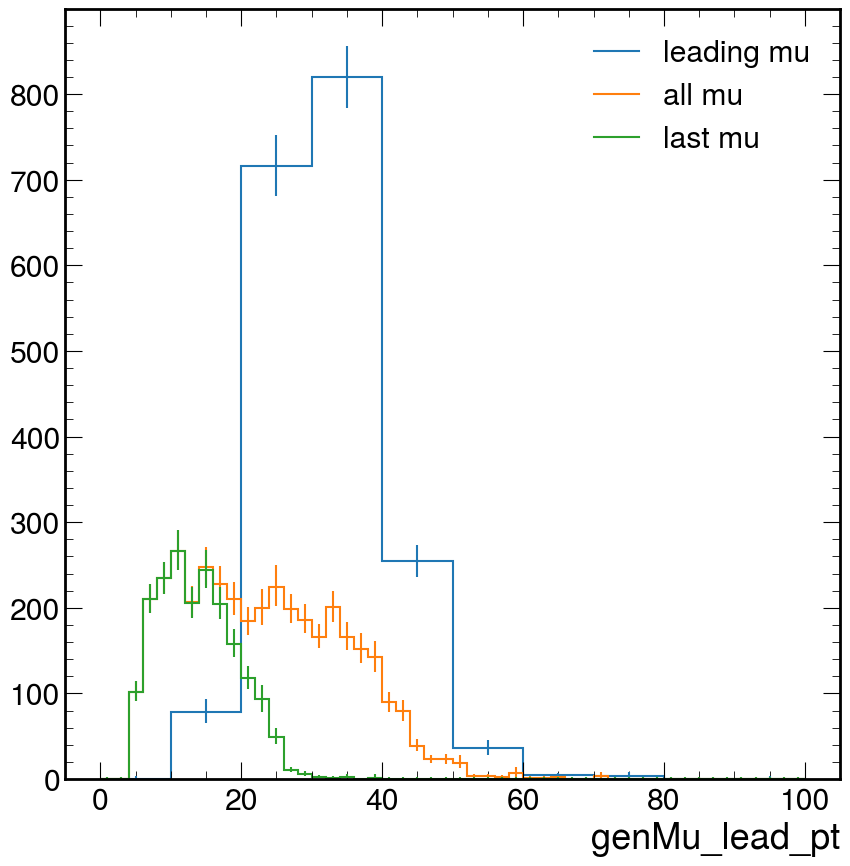

In [7]:
output['out']["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]["genMu_lead_pt"]["2mu2e", :100j].plot1d()
output['out']["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]["genMu_pt"]["2mu2e", :100j].plot1d()
output['out']["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]["genMu_last_pt"]["2mu2e", :100j].plot1d()
plt.legend(["leading mu", "all mu", "last mu"])
plt.show()

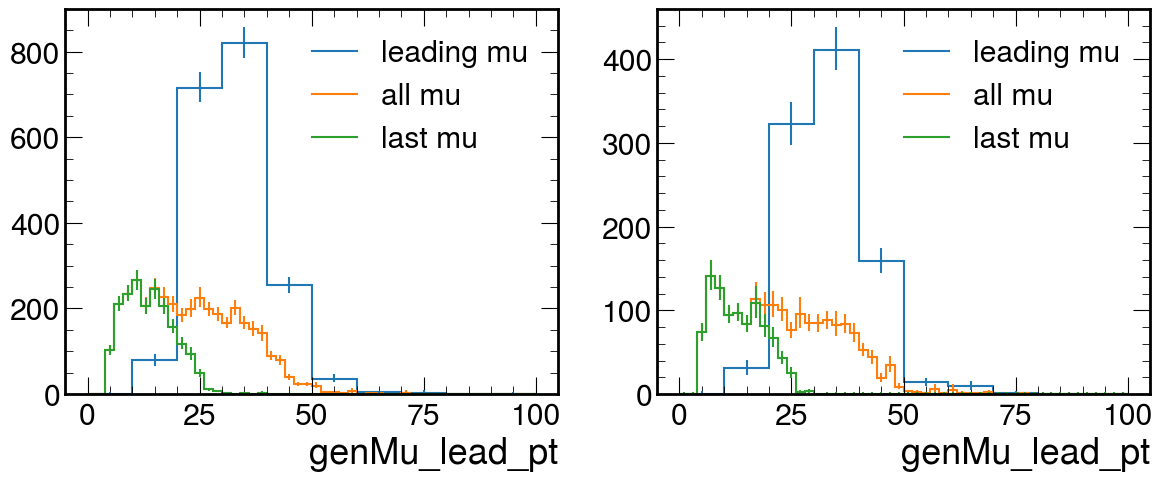

In [8]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,5))
output['out']["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]["genMu_lead_pt"]["2mu2e", :100j].plot1d(ax=ax1)
output['out']["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]["genMu_pt"]["2mu2e", :100j].plot1d(ax=ax1)
output['out']["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]["genMu_last_pt"]["2mu2e", :100j].plot1d(ax=ax1)
#genMu_last was made to show that it and the leading muon line up to trace the start and end of the larger genMu histogram.
#This was mostly for testing to show that the leading plot looked right
ax1.legend(["leading mu", "all mu", "last mu"])

output['out']["2Mu2E_100GeV_1p2GeV_0p096mm"]["hists"]["genMu_lead_pt"]["2mu2e", :100j].plot1d(ax=ax2)
output['out']["2Mu2E_100GeV_1p2GeV_0p096mm"]["hists"]["genMu_pt"]["2mu2e", :100j].plot1d(ax=ax2)
output['out']["2Mu2E_100GeV_1p2GeV_0p096mm"]["hists"]["genMu_last_pt"]["2mu2e", :100j].plot1d(ax=ax2)
ax2.legend(["leading mu", "all mu", "last mu"])

plt.show()

These plots attempt to use the 4mu channel, but the data sets being examined do not contain any events from there, so the histograms are empty until this can be fixed.

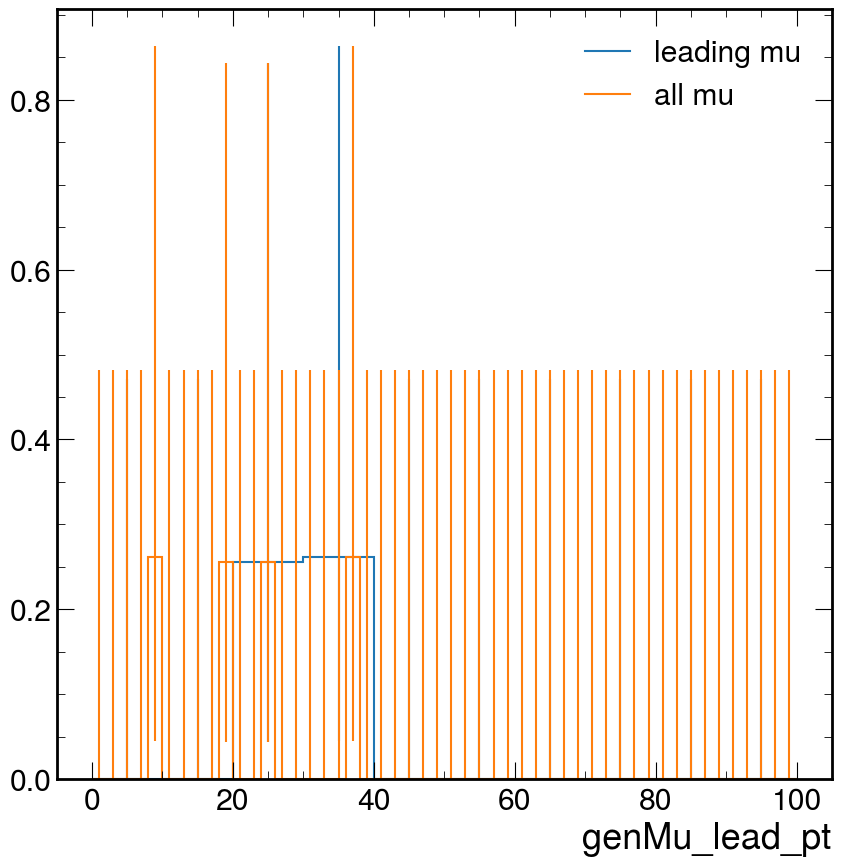

In [9]:
output['out']["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]["genMu_lead_pt"]["4mu", :100j].plot1d()
output['out']["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]["genMu_pt"]["4mu", :100j].plot1d()
plt.legend(["leading mu", "all mu"])
plt.show()
#This doesn't work beccause the sample being used only has the 2mu2e data being generated. (filename is XXTo2ATo2Mu2E)

/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(


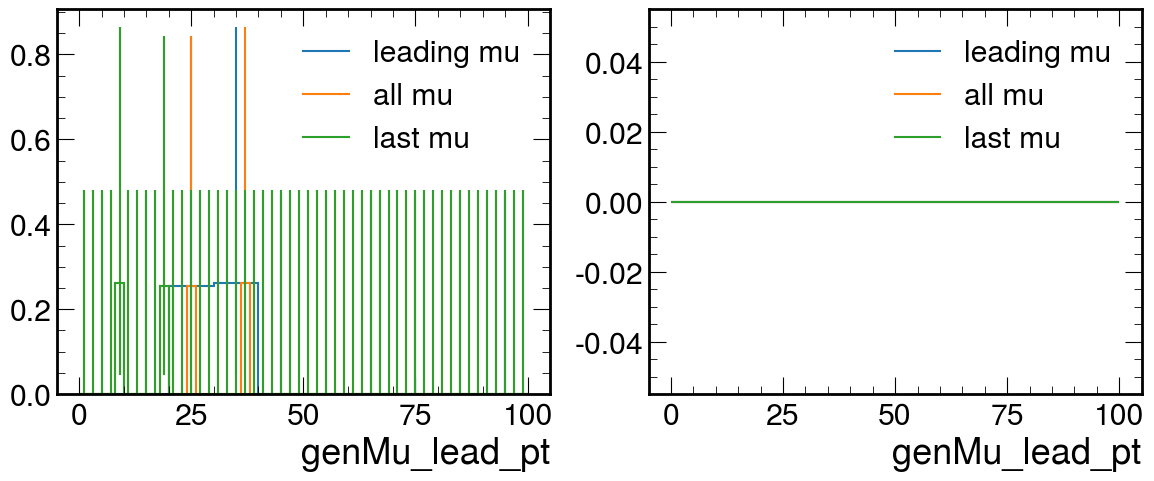

In [10]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(14,5))
output['out']["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]["genMu_lead_pt"]["4mu", :100j].plot1d(ax=ax1)
output['out']["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]["genMu_pt"]["4mu", :100j].plot1d(ax=ax1)
output['out']["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]["genMu_last_pt"]["4mu", :100j].plot1d(ax=ax1)
#genE_last was made to show that it and the leading electron line up to trace the start and end of the larger genE histogram.
#This was mostly for testing to show that the leading plot looked right
ax1.legend(["leading mu", "all mu", "last mu"])

output['out']["2Mu2E_100GeV_1p2GeV_0p096mm"]["hists"]["genMu_lead_pt"]["4mu", :100j].plot1d(ax=ax2)
output['out']["2Mu2E_100GeV_1p2GeV_0p096mm"]["hists"]["genMu_pt"]["4mu", :100j].plot1d(ax=ax2)
output['out']["2Mu2E_100GeV_1p2GeV_0p096mm"]["hists"]["genMu_last_pt"]["4mu", :100j].plot1d(ax=ax2)
#genE_last was made to show that it and the leading electron line up to trace the start and end of the larger genE histogram.
#This was mostly for testing to show that the leading plot looked right
ax2.legend(["leading mu", "all mu", "last mu"])

plt.show()

Text(1, 0, 'genMu_lead_pt on 4mu channel')

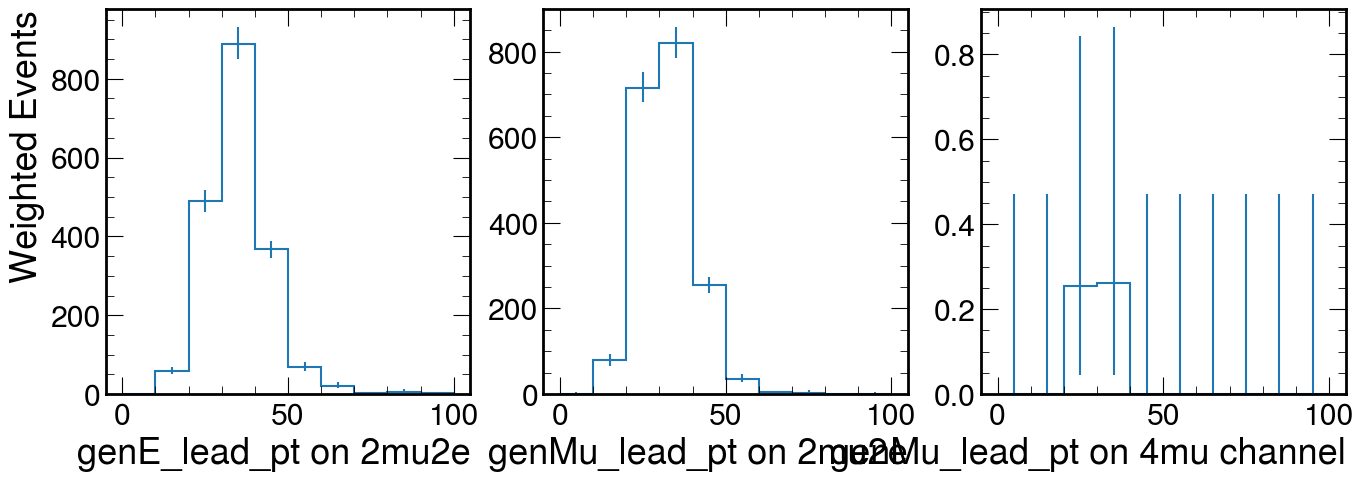

In [11]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16,5))
output['out']["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]["genE_lead_pt"]["2mu2e", :100j].plot1d(ax=ax1)
ax1.set_xlabel("genE_lead_pt on 2mu2e")
ax1.set_ylabel("Weighted Events")
output['out']["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]["genMu_lead_pt"]["2mu2e", :100j].plot1d(ax=ax2)
ax2.set_xlabel("genMu_lead_pt on 2mu2e")

output['out']["2Mu2E_100GeV_1p2GeV_9p6mm"]["hists"]["genMu_lead_pt"]["4mu", :100j].plot1d(ax=ax3)
ax3.set_xlabel("genMu_lead_pt on 4mu channel")

[StairsArtists(stairs=<matplotlib.patches.StepPatch object at 0x7f709e631f40>, errorbar=<ErrorbarContainer object of 3 artists>, legend_artist=<ErrorbarContainer object of 3 artists>)]

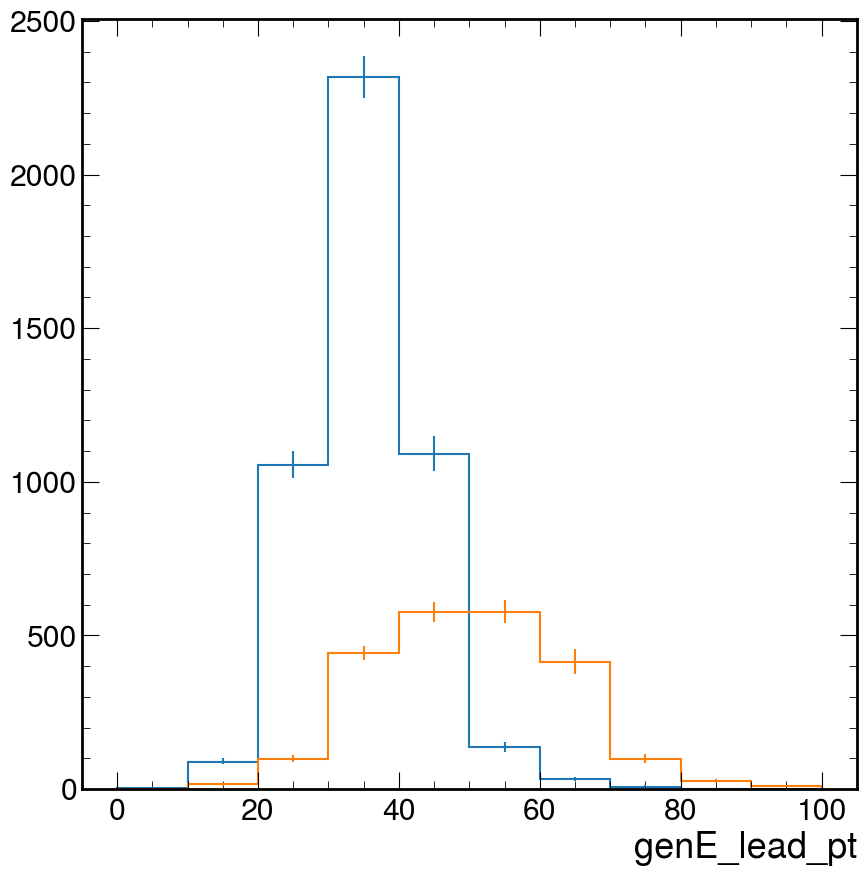

In [12]:
output['out']["SIDM_XXTo2ATo2Mu2E_mXX-100_mA-5_ctau-4"]["hists"]["genE_lead_pt"]["2mu2e", :100j].plot1d()
output['out']["SIDM_XXTo2ATo2Mu2E_mXX-150_mA-5_ctau-2p7"]["hists"]["genE_lead_pt"]["2mu2e", :100j].plot1d()

These plots replicate what was found in the analysis note. The first set of three show the leading electron and muon pt in the 2mu2e channel, and the next graphs show the same data on a log scale, as it is shown in the AN. The 4mu data is still left out.

Text(0, 1, 'Weighted Events')

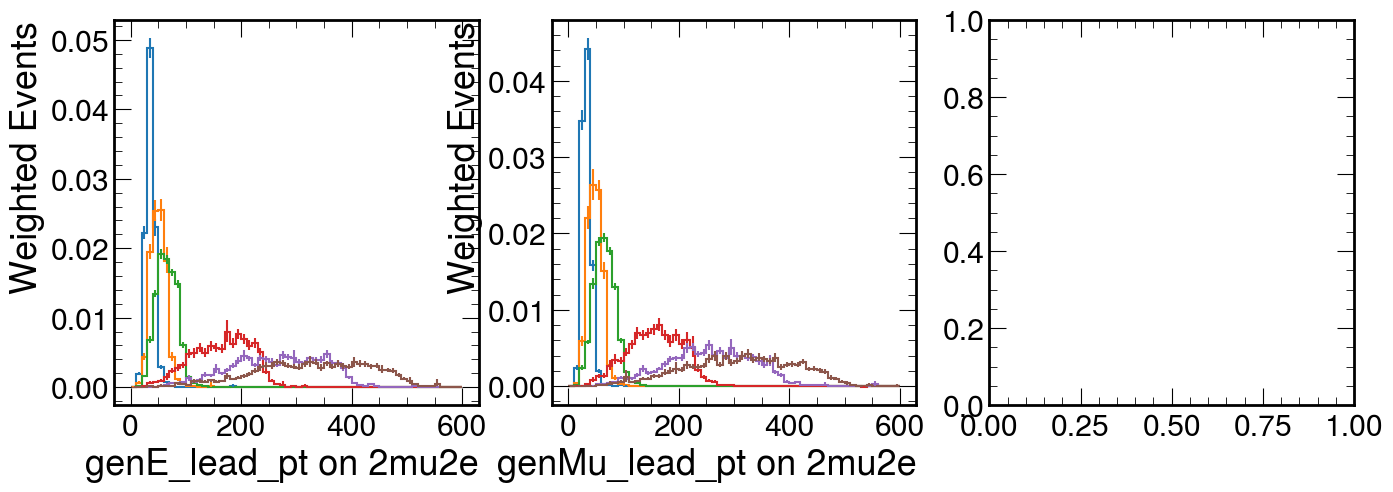

In [13]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16,5))
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-100_mA-5_ctau-4"]["hists"]["genE_lead_pt"]["2mu2e", :600j], ax=ax1, density=True)
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-150_mA-5_ctau-2p7"]["hists"]["genE_lead_pt"]["2mu2e", :600j], ax=ax1, density=True)
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-200_mA-5_ctau-2"]["hists"]["genE_lead_pt"]["2mu2e", :600j], ax=ax1, density=True)
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-500_mA-5_ctau-0p8"]["hists"]["genE_lead_pt"]["2mu2e", :600j], ax=ax1, density=True)
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-800_mA-5_ctau-0p5"]["hists"]["genE_lead_pt"]["2mu2e", :600j], ax=ax1, density=True)
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-1000_mA-5_ctau-0p4"]["hists"]["genE_lead_pt"]["2mu2e", :600j], ax=ax1, density=True)
ax1.set_xlabel("genE_lead_pt on 2mu2e")
ax1.set_ylabel("Weighted Events")
#ax1.legend(["mXX-100", "mXX-150", "mXX-200", "mXX-500", "mXX-800", "mXX-1000"])

hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-100_mA-5_ctau-4"]["hists"]["genMu_lead_pt"]["2mu2e", :600j], ax=ax2, density=True)
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-150_mA-5_ctau-2p7"]["hists"]["genMu_lead_pt"]["2mu2e", :600j], ax=ax2, density=True)
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-200_mA-5_ctau-2"]["hists"]["genMu_lead_pt"]["2mu2e", :600j], ax=ax2, density=True)
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-500_mA-5_ctau-0p8"]["hists"]["genMu_lead_pt"]["2mu2e", :600j], ax=ax2, density=True)
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-800_mA-5_ctau-0p5"]["hists"]["genMu_lead_pt"]["2mu2e", :600j], ax=ax2, density=True)
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-1000_mA-5_ctau-0p4"]["hists"]["genMu_lead_pt"]["2mu2e", :600j], ax=ax2, density=True)
ax2.set_xlabel("genMu_lead_pt on 2mu2e")
ax2.set_ylabel("Weighted Events")
#ax2.legend(["mXX-100", "mXX-150", "mXX-200", "mXX-500", "mXX-800", "mXX-1000"])

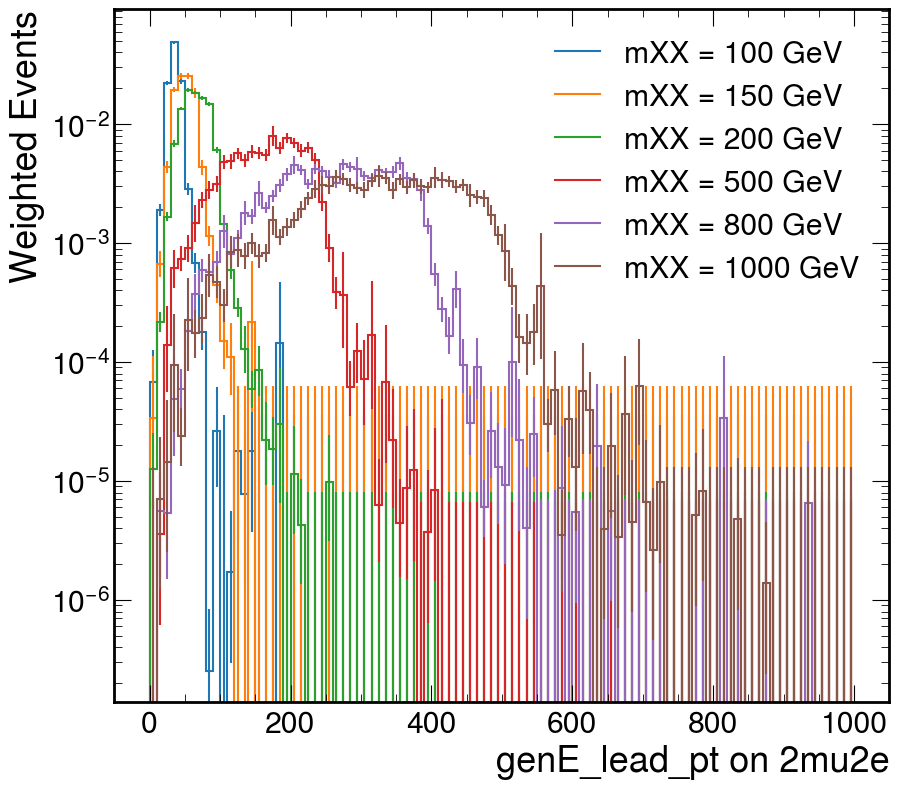

In [14]:
fig, (ax1) = plt.subplots(1,1, figsize=(10,9))
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-100_mA-5_ctau-4"]["hists"]["genE_lead_pt"]["2mu2e", :1000j], ax=ax1, density=True)
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-150_mA-5_ctau-2p7"]["hists"]["genE_lead_pt"]["2mu2e", :1000j], ax=ax1, density=True)
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-200_mA-5_ctau-2"]["hists"]["genE_lead_pt"]["2mu2e", :1000j], ax=ax1, density=True)
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-500_mA-5_ctau-0p8"]["hists"]["genE_lead_pt"]["2mu2e", :1000j], ax=ax1, density=True)
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-800_mA-5_ctau-0p5"]["hists"]["genE_lead_pt"]["2mu2e", :1000j], ax=ax1, density=True)
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-1000_mA-5_ctau-0p4"]["hists"]["genE_lead_pt"]["2mu2e", :1000j], ax=ax1, density=True)
ax1.set_xlabel("genE_lead_pt on 2mu2e")
ax1.set_ylabel("Weighted Events")
ax1.set_yscale("log")
ax1.legend(["mXX = 100 GeV", "mXX = 150 GeV", "mXX = 200 GeV", "mXX = 500 GeV", "mXX = 800 GeV", "mXX = 1000 GeV"])

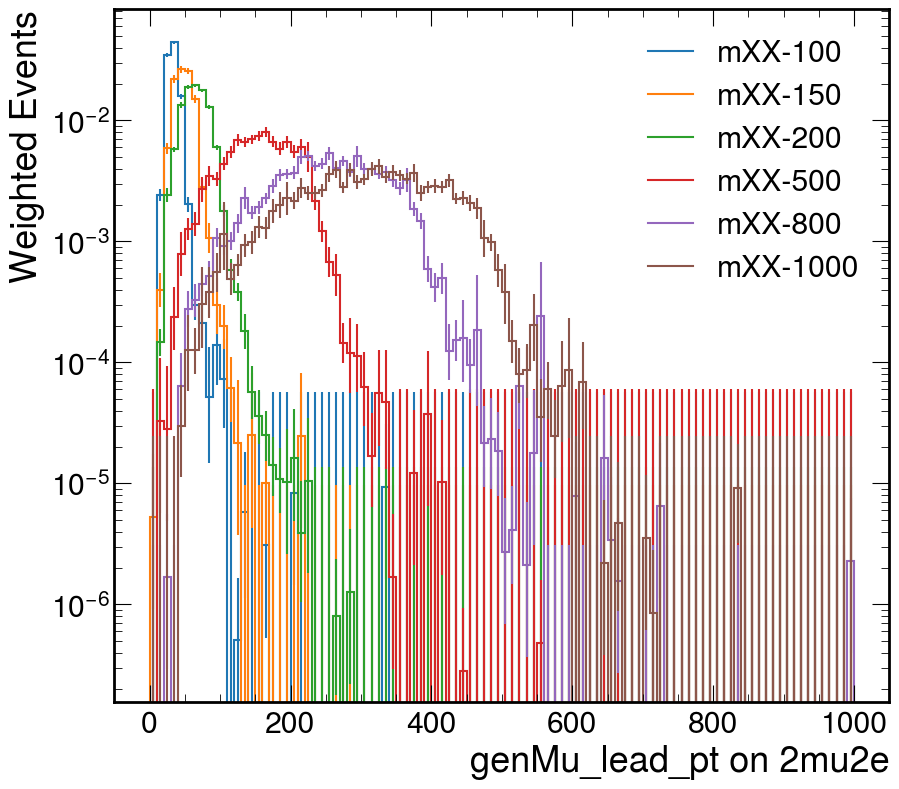

In [15]:
fig, (ax1) = plt.subplots(1,1, figsize=(10,9))
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-100_mA-5_ctau-4"]["hists"]["genMu_lead_pt"]["2mu2e", :], ax=ax1, density=True)
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-150_mA-5_ctau-2p7"]["hists"]["genMu_lead_pt"]["2mu2e", :], ax=ax1, density=True)
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-200_mA-5_ctau-2"]["hists"]["genMu_lead_pt"]["2mu2e", :], ax=ax1, density=True)
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-500_mA-5_ctau-0p8"]["hists"]["genMu_lead_pt"]["2mu2e", :], ax=ax1, density=True)
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-800_mA-5_ctau-0p5"]["hists"]["genMu_lead_pt"]["2mu2e", :], ax=ax1, density=True)
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-1000_mA-5_ctau-0p4"]["hists"]["genMu_lead_pt"]["2mu2e", :], ax=ax1, density=True)
ax1.set_xlabel("genMu_lead_pt on 2mu2e")
ax1.set_ylabel("Weighted Events")
ax1.set_yscale("log")
ax1.legend(["mXX-100", "mXX-150", "mXX-200", "mXX-500", "mXX-800", "mXX-1000"])

(exptext: Custom Text(0.001, 1, 'CMS'),
 expsuffix: Custom Text(0.001, 1.005, 'Simulation'))

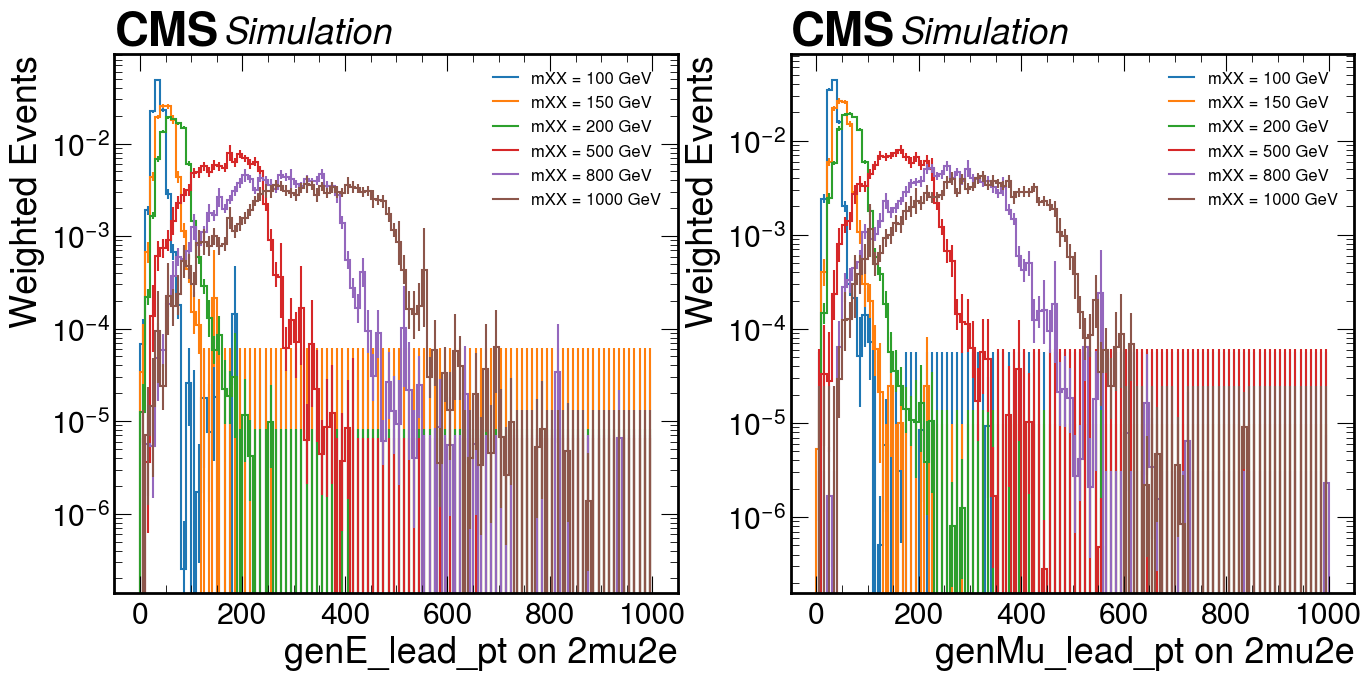

In [16]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,7))
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-100_mA-5_ctau-4"]["hists"]["genE_lead_pt"]["2mu2e", :], ax=ax1, density=True)
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-150_mA-5_ctau-2p7"]["hists"]["genE_lead_pt"]["2mu2e", :], ax=ax1, density=True)
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-200_mA-5_ctau-2"]["hists"]["genE_lead_pt"]["2mu2e", :], ax=ax1, density=True)
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-500_mA-5_ctau-0p8"]["hists"]["genE_lead_pt"]["2mu2e", :], ax=ax1, density=True)
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-800_mA-5_ctau-0p5"]["hists"]["genE_lead_pt"]["2mu2e", :], ax=ax1, density=True)
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-1000_mA-5_ctau-0p4"]["hists"]["genE_lead_pt"]["2mu2e", :], ax=ax1, density=True)
ax1.set_xlabel("genE_lead_pt on 2mu2e")
ax1.set_ylabel("Weighted Events")
ax1.set_yscale("log")
ax1.legend(["mXX = 100 GeV", "mXX = 150 GeV", "mXX = 200 GeV", "mXX = 500 GeV", "mXX = 800 GeV", "mXX = 1000 GeV"], fontsize=12)
hep.cms.text("Simulation", ax=ax1)

hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-100_mA-5_ctau-4"]["hists"]["genMu_lead_pt"]["2mu2e", :], ax=ax2, density=True)
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-150_mA-5_ctau-2p7"]["hists"]["genMu_lead_pt"]["2mu2e", :], ax=ax2, density=True)
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-200_mA-5_ctau-2"]["hists"]["genMu_lead_pt"]["2mu2e", :], ax=ax2, density=True)
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-500_mA-5_ctau-0p8"]["hists"]["genMu_lead_pt"]["2mu2e", :], ax=ax2, density=True)
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-800_mA-5_ctau-0p5"]["hists"]["genMu_lead_pt"]["2mu2e", :], ax=ax2, density=True)
hep.histplot(output['out']["SIDM_XXTo2ATo2Mu2E_mXX-1000_mA-5_ctau-0p4"]["hists"]["genMu_lead_pt"]["2mu2e", :], ax=ax2, density=True)
ax2.set_xlabel("genMu_lead_pt on 2mu2e")
ax2.set_ylabel("Weighted Events")
ax2.set_yscale("log")
ax2.legend(["mXX = 100 GeV", "mXX = 150 GeV", "mXX = 200 GeV", "mXX = 500 GeV", "mXX = 800 GeV", "mXX = 1000 GeV"], fontsize=12)
hep.cms.text("Simulation", ax=ax2)

These graphs are very similar to those in figure 2 of the analysis note. All of these data sets hold the mass of the dark photon (A) at 5 GeV.